# Assignment 1: Initial Random Configuration
## Martin Colahan


## Instructions:
This notebook is hosted at the following link where the code can be run on an online server.

In [87]:
import numpy as np
import pandas as pd

epsilon = 1
sigma = 1
number_density = 0.5
box_size = (8,8,8)    # (x, y, z)
n_dims = 3

n_parts = int(number_density * np.prod(np.array(box_size)))

min_dist = 0.8

part_locs = np.random.rand(n_parts, n_dims) * box_size
box_size = np.array(box_size)
min_dists = []
for i in range(n_parts):
    continue_looping = True
    if i == 0:
        continue
    loop_count = 0
    while continue_looping == True:
        if loop_count > 100:
            break
            
        dr = part_locs[i,:] - part_locs[:i,:]
        dr = dr - np.around(dr / box_size) * box_size   # PBC 
        dist = np.sqrt(np.sum(dr**2, axis=1))
        
        if (dist < min_dist).any() == True:
            part_locs[i, :] = np.random.rand(1, n_dims) * box_size
        else:
            continue_looping = False
            min_dists.append(min(dist))
            
        loop_count += 1

print(f"Minimum Distance between Particles: {min(min_dists)} σ")


Minimum Distance between Particles: 0.8014284663897726 σ


<IPython.core.display.Javascript object>


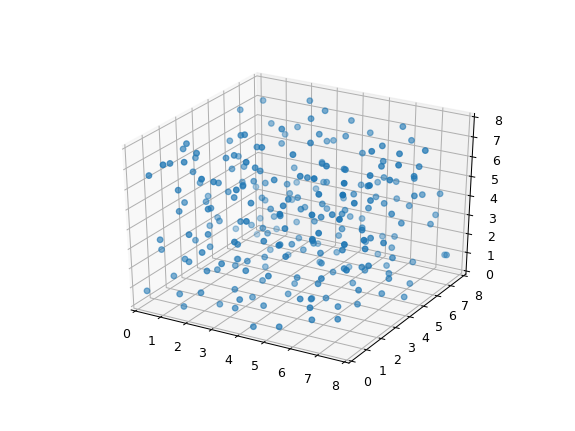

In [88]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlim(0,box_size[0])
ax.set_ylim(0,box_size[1])
ax.set_zlim(0,box_size[2])

ax.scatter3D(part_locs[:,0], part_locs[:,1], part_locs[:, 2])

plt.show()

In [77]:
box_size = np.array([5,5])[np.newaxis,:]

r = np.array([[5,2], [3,3], [2,1]])

dr = r[-1,:]-r[:-1,:] 
# print(dr)
# print(np.around(dr/box_size) * box_size)
dr = dr - np.around(dr/box_size)*box_size
print(dr)
np.sqrt(np.sum(dr**2, axis=1))


[[ 2. -1.]
 [-1. -2.]]


array([2.23606798, 2.23606798])